In [1]:
import pandas as pd
import numpy as np
import re
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

In [2]:
%config IPCompleter.greedy=True
#%config NotebookApp.iopub_data_rate_limit=1.0e10

In [3]:
data = open('/home/shobhit/NewDataset/UCI HAR Dataset/train/X_train.txt')

In [4]:
lines = data.readlines()
len(lines)

7352

In [5]:
lines[1]

'  2.7841883e-001 -1.6410568e-002 -1.2352019e-001 -9.9824528e-001 -9.7530022e-001 -9.6032199e-001 -9.9880719e-001 -9.7491437e-001 -9.5768622e-001 -9.4306751e-001 -5.5785126e-001 -8.1840869e-001  8.4930787e-001  6.8584458e-001  8.2263681e-001 -9.8193011e-001 -9.9999130e-001 -9.9978838e-001 -9.9840537e-001 -9.9915036e-001 -9.7786550e-001 -9.4822478e-001 -7.1489166e-001 -5.0093000e-001 -5.7097906e-001  6.1162716e-001 -3.2954862e-001  2.8421321e-001  2.8459454e-001  1.1570542e-001 -9.0962529e-002  2.9431041e-001 -2.8121057e-001  8.5988430e-002 -2.2152694e-002 -1.6656535e-002 -2.2064350e-001 -1.3428663e-002 -7.2691890e-002  5.7938169e-001  9.6656113e-001 -1.4155127e-001  1.0937881e-001 -9.9741134e-001 -9.8944741e-001 -9.3163868e-001 -9.9788359e-001 -9.8961366e-001 -9.3324040e-001  8.9206031e-001 -1.6134256e-001  1.2258573e-001  9.8452014e-001 -1.1489334e-001  1.0276411e-001 -3.8342955e-001  9.0782890e-001 -9.7058275e-001 -9.7850045e-001 -9.9918838e-001 -9.9002851e-001 -9.4168540e-001 -1.000

In [6]:
new_lines=[]
for i,line in enumerate(lines):
    temp = line.strip('\n')
    temp = temp.strip('  ')
    temp = re.sub("\s+",",",temp.strip())
    a=[float(e) for e in temp.split(',')]
    new_lines.append(a)

In [7]:
z=np.array(new_lines)
z.shape

(7352, 561)

In [8]:
pca = PCA(n_components=4)
pca.fit(z)

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [9]:
print(pca.explained_variance_ratio_)

[0.6255444  0.04913023 0.04121467 0.01874956]


In [10]:
sample = pca.transform(z)
sample[9]

array([-5.15569362,  0.51275569, -1.71171694, -0.47943645])

**Elbow using k-means score**

In [11]:
kmeans_score=[]
slope1=[]
sse=[]
K = range(1,10)
for k in K :
    kmeansModel1 = KMeans(n_clusters=k)
    labels=kmeansModel1.fit_predict(sample)
    centers = kmeansModel1.cluster_centers_
    #print(len(centers))
    #print(kmeansModel1.labels_)
    kmeans_score.append(kmeansModel1.score(sample))
    #print(kmeans_score)
    #sample_transformed = kmeansModel1.transform(sample)
    #print(sample_transformed)
    #Calculate slope of each line
    if k>1:
        s= (kmeans_score[-2]-kmeans_score[-1])
        slope1.append([k,s])

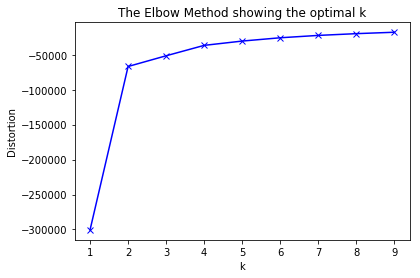

In [12]:
plt.plot(K,kmeans_score,'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [13]:
slope1

[[2, -233824.2363855477],
 [3, -15338.096314158378],
 [4, -14887.218274882223],
 [5, -6160.645519253223],
 [6, -4712.959518176784],
 [7, -3378.1700303528196],
 [8, -2514.5714191832994],
 [9, -2009.362592149355]]

In [15]:
#chose the value after which there is a reduction in gain(rather loss)
for a in range(0,7):
    change_slope=(slope1[a])[-1] - (slope1[a+1])[-1]
    if change_slope < 0:
        print('Optimal Number of Clusters = '+str((slope1[a][0])-1))

Optimal Number of Clusters = 1
Optimal Number of Clusters = 2
Optimal Number of Clusters = 3
Optimal Number of Clusters = 4
Optimal Number of Clusters = 5
Optimal Number of Clusters = 6
Optimal Number of Clusters = 7
